Initial data seems to be at the level of interaction between clients and AAA NorthEast. For the final analysis, the data should be aggregated at household level. First step is to aggregate them at individual level.
The data are not shared because of privacy and property rights restrictions.

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling

%matplotlib inline

In [5]:
df = pd.read_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/AAA prepared.csv", low_memory = False)

In [6]:
[i for i in df.columns]

['Unnamed: 0',
 'column1',
 'individual_key',
 'household_key',
 'member_flag',
 'city',
 'state_-_grouped',
 'zip5',
 'zip9',
 'fsv_cmsi_flag',
 'fsv_credit_card_flag',
 'fsv_deposit_program_flag',
 'fsv_home_equity_flag',
 'fsv_id_theft_flag',
 'fsv_mortgage_flag',
 'ins_client_flag',
 'trv_globalware_flag',
 'number_of_children',
 'responded_to_catalog',
 'race',
 'length_of_residence',
 'mail_responder',
 'home_owner',
 'income',
 'date_of_birth',
 'children',
 'education',
 'dwelling_type',
 'credit_ranges',
 'language',
 'gender',
 'active_expiration_date',
 'address_change_date',
 'bad_address_flag',
 'billing_code_description',
 'birth_date_mmddyyyy',
 'branch_name',
 'cancel_date',
 'cancel_reason',
 'county',
 'do_not_direct_mail_solicit',
 'email_available',
 'email_status',
 'ers_ent_count_year_1',
 'ers_ent_count_year_2',
 'ers_ent_count_year_3',
 'ers_member_cost_year_1',
 'ers_member_cost_year_2',
 'ers_member_cost_year_3',
 'right_gender',
 'join_aaa_date',
 'join_club_

In [104]:
cols_to_drop = [
    'age_2018_primary',
 'occupation_primary_blue_collar_-_inferred',
 'occupation_primary_blue_collar_-_known',
 'occupation_primary_management_-_inferred',
 'occupation_primary_management_-_known',
 'occupation_primary_office_administration_-_inferred',
 'occupation_primary_office_administration_-_known',
 'occupation_primary_other_-_inferred',
 'occupation_primary_other_-_known',
 'occupation_primary_professional_-_inferred',
 'occupation_primary_professional_-_known',
 'occupation_primary_retired_-_known',
 'occupation_primary_sales_-_inferred',
 'occupation_primary_sales_-_known',
 'occupation_primary_technical',
 'occupation_primary_nan',
 'kcl_primary_blue_sky_boomers',
 'kcl_primary_booming_with_confidence',
 'kcl_primary_cultural_connections',
 'kcl_primary_economic_challenges',
 'kcl_primary_family_union',
 'kcl_primary_flourishing_families',
 'kcl_primary_golden_year_guardians',
 'kcl_primary_middle_class_melting_pot',
 'kcl_primary_other',
 'kcl_primary_power_elite',
 'kcl_primary_promising_families',
 'kcl_primary_significant_singles',
 'kcl_primary_singles_and_starters',
 'kcl_primary_surburban_style',
 'kcl_primary_thriving_boomers',
 'kcl_primary_young_city_solos',
 'kcl_primary_nan',
 'mosaic_primary_bourgeois_prosperity',
 'mosaic_primary_career_and_family',
 'mosaic_primary_hard_working_blue_collar',
 'mosaic_primary_low_income_elders',
 'mosaic_primary_metropolitan_strugglers',
 'mosaic_primary_post_industrial_survivors',
 'mosaic_primary_routine_service_workers',
 'mosaic_primary_rural_inheritance',
 'mosaic_primary_sophisticated_singles',
 'mosaic_primary_nan',
 'language_primary_other',
 'language_primary_unknown',
 'language_primary_nan',
 'race_primary_asian',
 'race_primary_caucasion_/_white_-_eastern_european',
 'race_primary_caucasion_/_white_-_english',
 'race_primary_caucasion_/_white_-_jewish',
 'race_primary_caucasion_/_white_-_unknown',
 'race_primary_caucasion_/_white_-_white_non-american',
 'race_primary_hispanic_-_hispanic_origin',
 'race_primary_hispanic_-_portuguese_origin',
 'race_primary_middle_eastern',
 'race_primary_other',
 'race_primary_unknown',
 'race_primary_nan',
 'credit_ranges_primary',
 'credit_ranges_missing_primary',
 'income_primary',
 'income_missing_primary',
    'gender_primary_male',
 'gender_primary_nan'
]

In [105]:
print(df.shape)
df = df.drop(columns = cols_to_drop)
print(df.shape)

(13555, 463)
(13555, 399)


Check how many values are missing for a number of variables.

In [11]:
nan_to_inspect = [
    'do_not_direct_mail_solicit_nan',
    'dwelling_type_nan',
    'education_nan',
    'email_status_nan',
    'gender_grouped_nan',
    'home_owner_grouped_nan',
    'kcl_grouped_nan',
    'language_grouped_nan',
    'mosaic_global_household_nan',
    'motorcycle_indicator_nan',
    'new_mover_flag_nan',
    'occupant_type_nan',
    'occupation_group_grouped_nan',
    'opt-out_-_publication_nan',
    'plus_indicator_grouped_nan',
    'race_grouped_nan',
    'state_-_grouped_nan',
    'mail_responder_nan',
    'responded_to_catalog_nan'
]

In [14]:
for i in nan_to_inspect:
    print(df[i].value_counts(dropna = False))

0    13555
Name: do_not_direct_mail_solicit_nan, dtype: int64
0    10444
1     3111
Name: dwelling_type_nan, dtype: int64
0    9800
1    3755
Name: education_nan, dtype: int64
0    8786
1    4769
Name: email_status_nan, dtype: int64
0    7400
1    6155
Name: gender_grouped_nan, dtype: int64
0    9559
1    3996
Name: home_owner_grouped_nan, dtype: int64
0    10434
1     3121
Name: kcl_grouped_nan, dtype: int64
0    9800
1    3755
Name: language_grouped_nan, dtype: int64
0    10434
1     3121
Name: mosaic_global_household_nan, dtype: int64
0    13003
1      552
Name: new_mover_flag_y, dtype: int64
0    11478
1     2077
Name: motorcycle_indicator_nan, dtype: int64
0    13555
Name: new_mover_flag_nan, dtype: int64
1    13064
0      491
Name: occupant_type_nan, dtype: int64
0    7406
1    6149
Name: occupation_group_grouped_nan, dtype: int64
0    13555
Name: opt-out_-_publication_nan, dtype: int64
0    11490
1     2065
Name: plus_indicator_grouped_nan, dtype: int64
0    9800
1    3755
Name:

Check for most frequent category in case of categorical variables.

In [17]:
reference_to_inspect = [
 'education',
 'email_status',
 'gender_grouped',
 'kcl_grouped',
 'member_phone_type',
 'mosaic_global_household',
 'occupant_type',
 'occupation_group_grouped',
 'race_grouped']

In [18]:
for i in reference_to_inspect:
    print(df[i].value_counts(dropna = False))

NaN                  3755
Unknown              3314
Some College         2576
High School          2347
Completed College    1400
Graduated School      163
Name: education, dtype: int64
NaN             4769
Unsubscribed    4215
Active          3994
Held             468
Bounced          109
Name: email_status, dtype: int64
NaN       6155
Female    3943
Male      3457
Name: gender_grouped, dtype: int64
NaN                         3121
Autumn Years                2232
Booming with Confidence     1693
Golden Year Guardians       1428
Thriving Boomers            1040
Power Elite                  653
Blue Sky Boomers             635
Surburban Style              616
Family Union                 409
Singles and Starters         409
Middle Class Melting Pot     367
Flourishing Families         316
Promising Families           194
Significant Singles          180
Cultural Connections          94
Young City Solos              75
Other                         50
Economic Challenges           43
Na

In [19]:
reference_dict = {
    'education': 'Some College',
    'email_status': 'Active',
    'gender_grouped': 'Female',
    'kcl_grouped': 'Autumn Years',
    'member_phone_type': 'Wireless',
    'mosaic_global_household': 'Comfortable Retirement',
    'occupation_group_grouped': 'Retired - Inferred',
    'race_grouped': 'Caucasion / White - European'
}

In [108]:
cols_to_keep = [
 'individual_key',
 'household_key',
 'fsv_any',
 'new_product_any',
 'aaa_before_club_dummy',
 'fin_missing',
 'roadside_missing',
 'children_num',
 'children_missing',
 'credit_ranges_num',
 'credit_ranges_missing',
 'income_mid',
 'income_missing',
 'member_primary',
 'renew_not_notice',
 'billing_grouped_cancellation',
 'billing_grouped_downgrade_member',
 'billing_grouped_new_member',
 'billing_grouped_other',
 'billing_grouped_renewal_to_daily',
 'billing_grouped_upgrade_member',
 'billing_grouped_nan',
 'county_grouped_bristol',
 'county_grouped_kent',
 'county_grouped_newport',
 'county_grouped_other',
 'county_grouped_washington',
 'county_grouped_nan',
 'do_not_direct_mail_solicit_1.0',
 'dwelling_type_large_multi-family_w/o_apt_number',
 'dwelling_type_p.o._box',
 'dwelling_type_small_or_large_multi-family_w/apt_number',
 'dwelling_type_nan',
 'education_completed_college',
 'education_graduated_school',
 'education_high_school',
 'education_unknown',
 'education_nan',
 'email_status_bounced',
 'email_status_held',
 'email_status_unsubscribed',
 'email_status_nan',
 'fsv_cmsi_flag_y',
 'fsv_credit_card_flag_y',
 'fsv_deposit_program_flag_y',
 'fsv_home_equity_flag_y',
 'fsv_id_theft_flag_y',
 'fsv_mortgage_flag_y',
 'gender_grouped_male',
 'gender_grouped_nan',
 'home_owner_grouped_renter',
 'home_owner_grouped_nan',
 'ins_client_flag_y',
 'kcl_grouped_blue_sky_boomers',
 'kcl_grouped_booming_with_confidence',
 'kcl_grouped_cultural_connections',
 'kcl_grouped_economic_challenges',
 'kcl_grouped_family_union',
 'kcl_grouped_flourishing_families',
 'kcl_grouped_golden_year_guardians',
 'kcl_grouped_middle_class_melting_pot',
 'kcl_grouped_other',
 'kcl_grouped_power_elite',
 'kcl_grouped_promising_families',
 'kcl_grouped_significant_singles',
 'kcl_grouped_singles_and_starters',
 'kcl_grouped_surburban_style',
 'kcl_grouped_thriving_boomers',
 'kcl_grouped_young_city_solos',
 'kcl_grouped_nan',
 'language_grouped_other',
 'language_grouped_unknown',
 'language_grouped_nan',
 'member_phone_type_landline',
 'member_phone_type_voip',
 'member_phone_type_nan',
 'mosaic_global_household_bourgeois_prosperity',
 'mosaic_global_household_career_and_family',
 'mosaic_global_household_hard_working_blue_collar',
 'mosaic_global_household_low_income_elders',
 'mosaic_global_household_metropolitan_strugglers',
 'mosaic_global_household_post_industrial_survivors',
 'mosaic_global_household_routine_service_workers',
 'mosaic_global_household_rural_inheritance',
 'mosaic_global_household_sophisticated_singles',
 'mosaic_global_household_nan',
 'motorcycle_indicator_y',
 'motorcycle_indicator_nan',
 'new_mover_flag_y',
 'occupation_group_grouped_blue_collar_-_inferred',
 'occupation_group_grouped_blue_collar_-_known',
 'occupation_group_grouped_management_-_inferred',
 'occupation_group_grouped_management_-_known',
 'occupation_group_grouped_office_administration_-_inferred',
 'occupation_group_grouped_office_administration_-_known',
 'occupation_group_grouped_other_-_inferred',
 'occupation_group_grouped_other_-_known',
 'occupation_group_grouped_professional_-_inferred',
 'occupation_group_grouped_professional_-_known',
 'occupation_group_grouped_retired_-_inferred',
 'occupation_group_grouped_retired_-_known',
 'occupation_group_grouped_sales_-_inferred',
 'occupation_group_grouped_sales_-_known',
 'occupation_group_grouped_technical',
 'occupation_group_grouped_nan',
 'opt-out_-_publication_opt-out',
 'plus_indicator_grouped_plus_membership',
 'plus_indicator_grouped_premier_membership',
 'plus_indicator_grouped_nan',
 'race_grouped_asian',
 'race_grouped_caucasion_/_white_-_eastern_european',
 'race_grouped_caucasion_/_white_-_english',
 'race_grouped_caucasion_/_white_-_jewish',
 'race_grouped_caucasion_/_white_-_unknown',
 'race_grouped_caucasion_/_white_-_white_non-american',
 'race_grouped_hispanic_-_hispanic_origin',
 'race_grouped_hispanic_-_portuguese_origin',
 'race_grouped_middle_eastern',
 'race_grouped_other',
 'race_grouped_unknown',
 'race_grouped_nan',
 'state_-_grouped_ct',
 'trv_globalware_flag_y',
 'mail_responder_no',
 'responded_to_catalog_yes',
 'responded_to_catalog_yes_multiple_responses',
 'active_2019',
 'join_club_date_date',
 'active_2018',
 'age_2018',
 'new_member',
 'member_out',
 'cost_2019',
 'cost_2018',
 'calls_2019',
 'calls_2018',
 'call_2019_dummy'
]

In [109]:
df_to_group = df[cols_to_keep]
print(df.shape)
print(df_to_group.shape)

(13555, 399)
(13555, 137)


In [37]:
df_temp = df_to_group.groupby('individual_key').nunique()

In [38]:
for i in df_temp.columns:
    print(df_temp[i].value_counts(dropna = False))

1    6148
Name: individual_key, dtype: int64
1    6148
Name: household_key, dtype: int64
1    6148
Name: fsv_any, dtype: int64
1    6148
Name: new_product_any, dtype: int64
1    6146
2       2
Name: aaa_before_club_dummy, dtype: int64
1    6148
Name: fin_missing, dtype: int64
1    6137
2      11
Name: roadside_missing, dtype: int64
1    6148
Name: children_num, dtype: int64
1    6148
Name: children_missing, dtype: int64
1    6148
Name: credit_ranges_num, dtype: int64
1    6148
Name: credit_ranges_missing, dtype: int64
1    6148
Name: income_mid, dtype: int64
1    6148
Name: income_missing, dtype: int64
1    6119
2      29
Name: member_primary, dtype: int64
1    6147
2       1
Name: renew_not_notice, dtype: int64
1    6144
2       4
Name: billing_grouped_cancellation, dtype: int64
1    6148
Name: billing_grouped_downgrade_member, dtype: int64
1    6148
Name: billing_grouped_new_member, dtype: int64
1    6147
2       1
Name: billing_grouped_other, dtype: int64
1    6147
2       1
Name: b

Name: occupation_primary_nan, dtype: int64
1    6147
2       1
Name: kcl_primary_blue_sky_boomers, dtype: int64
1    6146
2       2
Name: kcl_primary_booming_with_confidence, dtype: int64
1    6148
Name: kcl_primary_cultural_connections, dtype: int64
1    6148
Name: kcl_primary_economic_challenges, dtype: int64
1    6146
2       2
Name: kcl_primary_family_union, dtype: int64
1    6146
2       2
Name: kcl_primary_flourishing_families, dtype: int64
1    6147
2       1
Name: kcl_primary_golden_year_guardians, dtype: int64
1    6146
2       2
Name: kcl_primary_middle_class_melting_pot, dtype: int64
1    6148
Name: kcl_primary_other, dtype: int64
1    6145
2       3
Name: kcl_primary_power_elite, dtype: int64
1    6148
Name: kcl_primary_promising_families, dtype: int64
1    6148
Name: kcl_primary_significant_singles, dtype: int64
1    6148
Name: kcl_primary_singles_and_starters, dtype: int64
1    6147
2       1
Name: kcl_primary_surburban_style, dtype: int64
1    6146
2       2
Name: kcl_pr

In [39]:
columns_to_check = list()
for i in df_temp.columns:
    if df_temp[i].value_counts(dropna = False).shape[0] > 1:
        columns_to_check.append(i)
columns_to_check

['aaa_before_club_dummy',
 'roadside_missing',
 'member_primary',
 'renew_not_notice',
 'billing_grouped_cancellation',
 'billing_grouped_other',
 'billing_grouped_renewal_to_daily',
 'billing_grouped_upgrade_member',
 'email_status_held',
 'email_status_unsubscribed',
 'email_status_nan',
 'member_phone_type_landline',
 'member_phone_type_voip',
 'member_phone_type_nan',
 'motorcycle_indicator_y',
 'motorcycle_indicator_nan',
 'plus_indicator_grouped_plus_membership',
 'plus_indicator_grouped_premier_membership',
 'plus_indicator_grouped_nan',
 'join_club_date_date',
 'age_2018_primary',
 'occupation_primary_blue_collar_-_inferred',
 'occupation_primary_blue_collar_-_known',
 'occupation_primary_management_-_inferred',
 'occupation_primary_management_-_known',
 'occupation_primary_office_administration_-_known',
 'occupation_primary_professional_-_inferred',
 'occupation_primary_professional_-_known',
 'occupation_primary_retired_-_known',
 'occupation_primary_sales_-_known',
 'occupa

In [ ]:
dict_columns = {
    'aaa_before_club_dummy': 0,
    'member_primary',
    'renew_not_notice',
    'billing_grouped_cancellation',
    'billing_grouped_other',
    'billing_grouped_renewal_to_daily',
    'billing_grouped_upgrade_member',
    'email_status_held',
    'email_status_unsubscribed',
    'email_status_nan': 0,
    'member_phone_type_landline',
    'member_phone_type_voip',
    'member_phone_type_nan': 0,
    'motorcycle_indicator_y': 1,
    'motorcycle_indicator_nan': 0,
    'plus_indicator_grouped_plus_membership',
    'plus_indicator_grouped_premier_membership',
    'plus_indicator_grouped_nan': 0,
    'join_club_date_date': min,
    'age_2018_primary',
    'occupation_primary_blue_collar_-_inferred',
    'occupation_primary_blue_collar_-_known',
    'occupation_primary_management_-_inferred',
    'occupation_primary_management_-_known',
    'occupation_primary_office_administration_-_known',
    'occupation_primary_professional_-_inferred',
    'occupation_primary_professional_-_known',
    'occupation_primary_retired_-_known',
    'occupation_primary_sales_-_known',
    'occupation_primary_technical',
    'occupation_primary_nan',
    'kcl_primary_blue_sky_boomers',
    'kcl_primary_booming_with_confidence',
    'kcl_primary_family_union',
    'kcl_primary_flourishing_families',
    'kcl_primary_golden_year_guardians',
    'kcl_primary_middle_class_melting_pot',
    'kcl_primary_power_elite',
    'kcl_primary_surburban_style',
    'kcl_primary_thriving_boomers',
    'kcl_primary_young_city_solos',
    'kcl_primary_nan',
    'mosaic_primary_bourgeois_prosperity',
    'mosaic_primary_career_and_family',
    'mosaic_primary_hard_working_blue_collar',
    'mosaic_primary_post_industrial_survivors',
    'mosaic_primary_routine_service_workers',
    'mosaic_primary_sophisticated_singles',
    'mosaic_primary_nan',
    'language_primary_nan',
    'race_primary_caucasion_/_white_-_eastern_european',
    'race_primary_caucasion_/_white_-_english',
    'race_primary_caucasion_/_white_-_jewish',
    'race_primary_caucasion_/_white_-_unknown',
    'race_primary_caucasion_/_white_-_white_non-american',
    'race_primary_hispanic_-_hispanic_origin',
    'race_primary_middle_eastern',
    'race_primary_other',
    'race_primary_nan',
    'credit_ranges_primary',
    'credit_ranges_missing_primary',
    'income_primary',
    'income_missing_primary',
    'gender_primary_male',
    'gender_primary_nan'
}

In [41]:
ind_key = df_temp[df_temp.aaa_before_club_dummy == 2].index
ind_key

Float64Index([19116725.0, 25747756.0], dtype='float64', name='individual_key')

In [43]:
df.loc[df.individual_key.isin(ind_key), ['individual_key','aaa_before_club_dummy', 'join_aaa_year', 'join_club_year']]

,individual_key,aaa_before_club_dummy,join_aaa_year,join_club_year
1528,19116725.0,0,1972,1972
1529,19116725.0,1,1992,2001
3342,25747756.0,0,1964,1964
3344,25747756.0,1,1998,1999
3345,25747756.0,1,1998,1999
3346,25747756.0,1,1998,1999


In [70]:
### IF INDIVIDUAL IS STATED AS PRIMARY IN SOME RECORDS AND NOT IN OTHERS, TAKE THE VALUE FROM THE LATEST RECORD

ind_key = df_temp[df_temp.member_primary == 2].index
df.loc[df.individual_key.isin(ind_key), ['individual_key','member_primary','record_date']]
dict_primary = {}
for i in ind_key:
    df_ind_key = df.loc[df.individual_key == i, ['individual_key','member_primary','record_date']]
    primary_fix = df_ind_key.loc[df_ind_key.record_date == max(df_ind_key.record_date), 'member_primary']
    df.loc[df.individual_key == i,'member_primary'] = primary_fix.values    

In [74]:
ind_key = df_temp[df_temp.renew_not_notice == 2].index
for i in ind_key:
    df_ind_key = df.loc[df.individual_key == i, ['individual_key','renew_not_notice','record_date']]
    fix_value = df_ind_key.loc[df_ind_key.record_date == max(df_ind_key.record_date), 'renew_not_notice']
    df.loc[df.individual_key == i,'renew_not_notice'] = fix_value.values 

In [78]:
list_latest = [
    'member_primary',
    'renew_not_notice',
    'billing_grouped_cancellation',
    'billing_grouped_other',
    'billing_grouped_renewal_to_daily',
    'billing_grouped_upgrade_member',
    'email_status_held',
    'email_status_unsubscribed',
    'member_phone_type_landline',
    'member_phone_type_voip',
    'plus_indicator_grouped_plus_membership',
    'plus_indicator_grouped_premier_membership'
]

In [88]:
for varname in list_latest:
    ind_key = df_temp[df_temp[varname] > 1].index
    for i in ind_key:
        df_ind_key = df.loc[df.individual_key == i, ['individual_key', varname, 'record_date']]
        fix_value = df_ind_key.loc[df_ind_key.record_date == max(df_ind_key.record_date), varname]
        df.loc[df.individual_key == i, varname] = fix_value.values[0]    

In [90]:
dict_to_number = {
    'aaa_before_club_dummy': 0,
    'email_status_nan': 0,
    'member_phone_type_nan': 0,
    'motorcycle_indicator_y': 1,
    'motorcycle_indicator_nan': 0,
    'plus_indicator_grouped_nan': 0
}

In [95]:
for varname in dict_to_number:
    ind_key = df_temp[df_temp[varname] > 1].index
    for i in ind_key:
        df.loc[df.individual_key == i, varname] = dict_to_number[varname]

In [103]:
ind_key = df_temp[df_temp['join_club_date_date'] > 1].index
for i in ind_key:
    df_ind_key = df.loc[df.individual_key == i, ['individual_key', 'join_club_date_date', 'record_date']]
    fix_value = df_ind_key.loc[df_ind_key.join_club_date_date == min(df_ind_key.join_club_date_date), 'join_club_date_date']
    df.loc[df.individual_key == i, 'join_club_date_date'] = fix_value.values[0]    

In [169]:
df_to_group = df[cols_to_keep]

In [113]:
df_temp = df_to_group.groupby('individual_key').nunique()

In [114]:
columns_to_double_check = list()
for i in df_temp.columns:
    if df_temp[i].value_counts(dropna = False).shape[0] > 1:
        columns_to_double_check.append(i)
columns_to_double_check

['roadside_missing',
 'cost_2019',
 'cost_2018',
 'calls_2019',
 'calls_2018',
 'call_2019_dummy']

In [115]:
df = df.assign(age_2018_primary = df.age_2018 * df.member_primary)

In [117]:
cols_to_keep.append('age_2018_primary')

['individual_key',
 'household_key',
 'fsv_any',
 'new_product_any',
 'aaa_before_club_dummy',
 'fin_missing',
 'roadside_missing',
 'children_num',
 'children_missing',
 'credit_ranges_num',
 'credit_ranges_missing',
 'income_mid',
 'income_missing',
 'member_primary',
 'renew_not_notice',
 'billing_grouped_cancellation',
 'billing_grouped_downgrade_member',
 'billing_grouped_new_member',
 'billing_grouped_other',
 'billing_grouped_renewal_to_daily',
 'billing_grouped_upgrade_member',
 'billing_grouped_nan',
 'county_grouped_bristol',
 'county_grouped_kent',
 'county_grouped_newport',
 'county_grouped_other',
 'county_grouped_washington',
 'county_grouped_nan',
 'do_not_direct_mail_solicit_1.0',
 'dwelling_type_large_multi-family_w/o_apt_number',
 'dwelling_type_p.o._box',
 'dwelling_type_small_or_large_multi-family_w/apt_number',
 'dwelling_type_nan',
 'education_completed_college',
 'education_graduated_school',
 'education_high_school',
 'education_unknown',
 'education_nan',
 'ema

In [116]:
df = df.assign(occupation_grouped_primary = df.occupation_group_grouped)
df.loc[df.member_primary == 0, 'occupation_grouped_primary'] = 0
pd.crosstab(df.occupation_grouped_primary, df.member_primary)

member_primary,0.0,1.0
occupation_grouped_primary,,
0,5448,0
Blue Collar - Inferred,0,133
Blue Collar - Known,0,139
Management - Inferred,0,151
Management - Known,0,404
Office Administration - Inferred,0,98
Office Administration - Known,0,138
Other - Inferred,0,197
Other - Known,0,112


In [119]:
cols_for_primary = [
    'credit_ranges_num',
    'credit_ranges_missing',
    'income_mid',
    'income_missing',
    'education_completed_college',
    'education_graduated_school',
    'education_high_school',
    'education_unknown',
    'education_nan',
    'gender_grouped_male',
    'gender_grouped_nan',
    'kcl_grouped_blue_sky_boomers',
    'kcl_grouped_booming_with_confidence',
    'kcl_grouped_cultural_connections',
    'kcl_grouped_economic_challenges',
    'kcl_grouped_family_union',
    'kcl_grouped_flourishing_families',
    'kcl_grouped_golden_year_guardians',
    'kcl_grouped_middle_class_melting_pot',
    'kcl_grouped_other',
    'kcl_grouped_power_elite',
    'kcl_grouped_promising_families',
    'kcl_grouped_significant_singles',
    'kcl_grouped_singles_and_starters',
    'kcl_grouped_surburban_style',
    'kcl_grouped_thriving_boomers',
    'kcl_grouped_young_city_solos',
    'kcl_grouped_nan',
    'language_grouped_other',
    'language_grouped_unknown',
    'language_grouped_nan',
    'mosaic_global_household_bourgeois_prosperity',
 'mosaic_global_household_career_and_family',
 'mosaic_global_household_hard_working_blue_collar',
 'mosaic_global_household_low_income_elders',
 'mosaic_global_household_metropolitan_strugglers',
 'mosaic_global_household_post_industrial_survivors',
 'mosaic_global_household_routine_service_workers',
 'mosaic_global_household_rural_inheritance',
 'mosaic_global_household_sophisticated_singles',
 'mosaic_global_household_nan',
    'occupation_group_grouped_blue_collar_-_inferred',
 'occupation_group_grouped_blue_collar_-_known',
 'occupation_group_grouped_management_-_inferred',
 'occupation_group_grouped_management_-_known',
 'occupation_group_grouped_office_administration_-_inferred',
 'occupation_group_grouped_office_administration_-_known',
 'occupation_group_grouped_other_-_inferred',
 'occupation_group_grouped_other_-_known',
 'occupation_group_grouped_professional_-_inferred',
 'occupation_group_grouped_professional_-_known',
 'occupation_group_grouped_retired_-_inferred',
 'occupation_group_grouped_retired_-_known',
 'occupation_group_grouped_sales_-_inferred',
 'occupation_group_grouped_sales_-_known',
 'occupation_group_grouped_technical',
 'occupation_group_grouped_nan',
    'race_grouped_asian',
 'race_grouped_caucasion_/_white_-_eastern_european',
 'race_grouped_caucasion_/_white_-_english',
 'race_grouped_caucasion_/_white_-_jewish',
 'race_grouped_caucasion_/_white_-_unknown',
 'race_grouped_caucasion_/_white_-_white_non-american',
 'race_grouped_hispanic_-_hispanic_origin',
 'race_grouped_hispanic_-_portuguese_origin',
 'race_grouped_middle_eastern',
 'race_grouped_other',
 'race_grouped_unknown',
 'race_grouped_nan',
]

In [126]:
dict_for_primary = {}
for varname_source in cols_for_primary:
    dict_for_primary[varname_source] = 'primary_' + varname_source
dict_for_primary

{'credit_ranges_num': 'primary_credit_ranges_num',
 'credit_ranges_missing': 'primary_credit_ranges_missing',
 'income_mid': 'primary_income_mid',
 'income_missing': 'primary_income_missing',
 'education_completed_college': 'primary_education_completed_college',
 'education_graduated_school': 'primary_education_graduated_school',
 'education_high_school': 'primary_education_high_school',
 'education_unknown': 'primary_education_unknown',
 'education_nan': 'primary_education_nan',
 'gender_grouped_male': 'primary_gender_grouped_male',
 'gender_grouped_nan': 'primary_gender_grouped_nan',
 'kcl_grouped_blue_sky_boomers': 'primary_kcl_grouped_blue_sky_boomers',
 'kcl_grouped_booming_with_confidence': 'primary_kcl_grouped_booming_with_confidence',
 'kcl_grouped_cultural_connections': 'primary_kcl_grouped_cultural_connections',
 'kcl_grouped_economic_challenges': 'primary_kcl_grouped_economic_challenges',
 'kcl_grouped_family_union': 'primary_kcl_grouped_family_union',
 'kcl_grouped_flourish

In [127]:
print(df.shape)
for varname_source in dict_for_primary:
    df_temp = pd.DataFrame(df.member_primary * df[varname_source], columns = [dict_for_primary[varname_source]])
    df = pd.concat([df, df_temp], axis = 1)
df.shape

(13555, 400)


(13555, 469)

In [128]:
for varname_source in dict_for_primary:
    cols_to_keep.append(dict_for_primary[varname_source])
cols_to_keep

['individual_key',
 'household_key',
 'fsv_any',
 'new_product_any',
 'aaa_before_club_dummy',
 'fin_missing',
 'roadside_missing',
 'children_num',
 'children_missing',
 'credit_ranges_num',
 'credit_ranges_missing',
 'income_mid',
 'income_missing',
 'member_primary',
 'renew_not_notice',
 'billing_grouped_cancellation',
 'billing_grouped_downgrade_member',
 'billing_grouped_new_member',
 'billing_grouped_other',
 'billing_grouped_renewal_to_daily',
 'billing_grouped_upgrade_member',
 'billing_grouped_nan',
 'county_grouped_bristol',
 'county_grouped_kent',
 'county_grouped_newport',
 'county_grouped_other',
 'county_grouped_washington',
 'county_grouped_nan',
 'do_not_direct_mail_solicit_1.0',
 'dwelling_type_large_multi-family_w/o_apt_number',
 'dwelling_type_p.o._box',
 'dwelling_type_small_or_large_multi-family_w/apt_number',
 'dwelling_type_nan',
 'education_completed_college',
 'education_graduated_school',
 'education_high_school',
 'education_unknown',
 'education_nan',
 'ema

In [134]:
df['new_product_any'] = df.new_product_any.astype('float64')
df['new_product_any'].tail()

13550    1.0
13551    1.0
13552    0.0
13553    0.0
13554    0.0
Name: new_product_any, dtype: float64

In [129]:
df_to_group = df[cols_to_keep]
df_temp = df_to_group.groupby('individual_key').nunique()

In [130]:
columns_to_triple_check = list()
for i in df_temp.columns:
    if df_temp[i].value_counts(dropna = False).shape[0] > 1:
        columns_to_triple_check.append(i)
columns_to_triple_check

['roadside_missing',
 'cost_2019',
 'cost_2018',
 'calls_2019',
 'calls_2018',
 'call_2019_dummy']

In [170]:
df_ind = df_to_group.groupby('individual_key').max()

In [171]:
df_ind.tail()

,household_key,fsv_any,new_product_any,aaa_before_club_dummy,fin_missing,roadside_missing,children_num,children_missing,credit_ranges_num,credit_ranges_missing,...,primary_race_grouped_caucasion_/_white_-_english,primary_race_grouped_caucasion_/_white_-_jewish,primary_race_grouped_caucasion_/_white_-_unknown,primary_race_grouped_caucasion_/_white_-_white_non-american,primary_race_grouped_hispanic_-_hispanic_origin,primary_race_grouped_hispanic_-_portuguese_origin,primary_race_grouped_middle_eastern,primary_race_grouped_other,primary_race_grouped_unknown,primary_race_grouped_nan
individual_key,,,,,,,,,,,,,,,,,,,,,
212310962.0,1963199.0,1,1.0,0,1,0,0.0,1.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212312283.0,4898837.0,1,1.0,0,1,0,0.0,1.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212317919.0,8163452.0,0,0.0,0,1,0,0.0,1.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212320920.0,100035899.0,1,1.0,0,1,1,0.0,1.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212321856.0,99993288.0,0,0.0,1,1,0,0.0,1.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [172]:
df_ind = df_ind.reset_index()
df_ind.tail()

,individual_key,household_key,fsv_any,new_product_any,aaa_before_club_dummy,fin_missing,roadside_missing,children_num,children_missing,credit_ranges_num,...,primary_race_grouped_caucasion_/_white_-_english,primary_race_grouped_caucasion_/_white_-_jewish,primary_race_grouped_caucasion_/_white_-_unknown,primary_race_grouped_caucasion_/_white_-_white_non-american,primary_race_grouped_hispanic_-_hispanic_origin,primary_race_grouped_hispanic_-_portuguese_origin,primary_race_grouped_middle_eastern,primary_race_grouped_other,primary_race_grouped_unknown,primary_race_grouped_nan
6143,212310962.0,1963199.0,1,1.0,0,1,0,0.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6144,212312283.0,4898837.0,1,1.0,0,1,0,0.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6145,212317919.0,8163452.0,0,0.0,0,1,0,0.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6146,212320920.0,100035899.0,1,1.0,0,1,1,0.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6147,212321856.0,99993288.0,0,0.0,1,1,0,0.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [141]:
# profil_ind = df_ind.profile_report().to_file(output_file = "C:/Slava/08 Studies/00 Emeritus/04 - Capstone/AAA ind.html")

In [173]:
df_ind = df_ind.assign(join_club_year = pd.to_datetime(df_ind.join_club_date_date).dt.year)

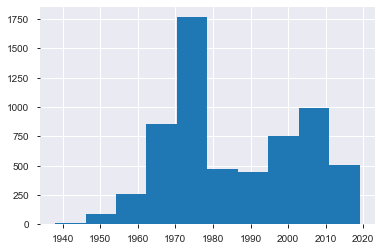

In [143]:
df_ind.join_club_year.hist()

In [174]:
cols_to_drop = [
    'county_grouped_nan',
    'billing_grouped_nan',
    'roadside_missing',
    'join_club_date_date'
]

In [175]:
print(df_ind.shape)
df_ind = df_ind.drop(columns = cols_to_drop)
print(df_ind.shape)

(6148, 208)
(6148, 204)


In [158]:
[i for i in df_ind.columns]

['individual_key',
 'household_key',
 'fsv_any',
 'new_product_any',
 'aaa_before_club_dummy',
 'fin_missing',
 'children_num',
 'children_missing',
 'credit_ranges_num',
 'credit_ranges_missing',
 'income_mid',
 'income_missing',
 'member_primary',
 'renew_not_notice',
 'billing_grouped_cancellation',
 'billing_grouped_downgrade_member',
 'billing_grouped_new_member',
 'billing_grouped_other',
 'billing_grouped_renewal_to_daily',
 'billing_grouped_upgrade_member',
 'county_grouped_bristol',
 'county_grouped_kent',
 'county_grouped_newport',
 'county_grouped_other',
 'county_grouped_washington',
 'do_not_direct_mail_solicit_1.0',
 'dwelling_type_large_multi-family_w/o_apt_number',
 'dwelling_type_p.o._box',
 'dwelling_type_small_or_large_multi-family_w/apt_number',
 'dwelling_type_nan',
 'education_completed_college',
 'education_graduated_school',
 'education_high_school',
 'education_unknown',
 'education_nan',
 'email_status_bounced',
 'email_status_held',
 'email_status_unsubscribe

In [159]:
export_csv = df_ind.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/AAA ind.csv")

In [160]:
dict_to_agg = {
    'individual_key': "nunique",
 'fsv_any': "max",
 'new_product_any': "max",
 'aaa_before_club_dummy': "max",
 'fin_missing': "min",
 'children_num': "max",
 'children_missing': "min",
 'credit_ranges_num': "max",
 'credit_ranges_missing': "min",
 'income_mid': "max",
 'income_missing': "min",
 'member_primary': "max",
 'renew_not_notice': "max",
 'billing_grouped_cancellation': "max",
 'billing_grouped_downgrade_member': "max",
 'billing_grouped_new_member': "max",
 'billing_grouped_other': "max",
 'billing_grouped_renewal_to_daily': "max",
 'billing_grouped_upgrade_member': "max",
 'county_grouped_bristol': "max",
 'county_grouped_kent': "max",
 'county_grouped_newport': "max",
 'county_grouped_other': "max",
 'county_grouped_washington': "max",
 'do_not_direct_mail_solicit_1.0': "max",
 'dwelling_type_large_multi-family_w/o_apt_number': "max",
 'dwelling_type_p.o._box': "max",
 'dwelling_type_small_or_large_multi-family_w/apt_number': "max",
 'dwelling_type_nan': "max",
 'education_completed_college': "max",
 'education_graduated_school': "max",
 'education_high_school': "max",
 'education_unknown': "min",
 'education_nan': "min",
 'email_status_bounced': "max",
 'email_status_held': "max",
 'email_status_unsubscribed': "max",
 'email_status_nan': "min",
 'fsv_cmsi_flag_y': "max",
 'fsv_credit_card_flag_y': "max",
 'fsv_deposit_program_flag_y': "max",
 'fsv_home_equity_flag_y': "max",
 'fsv_id_theft_flag_y': "max",
 'fsv_mortgage_flag_y': "max",
 'gender_grouped_male': "max",
 'gender_grouped_nan': "min",
 'home_owner_grouped_renter': "max",
 'home_owner_grouped_nan': "min",
 'ins_client_flag_y': "max",
 'kcl_grouped_blue_sky_boomers': "max",
 'kcl_grouped_booming_with_confidence': "max",
 'kcl_grouped_cultural_connections': "max",
 'kcl_grouped_economic_challenges': "max",
 'kcl_grouped_family_union': "max",
 'kcl_grouped_flourishing_families': "max",
 'kcl_grouped_golden_year_guardians': "max",
 'kcl_grouped_middle_class_melting_pot': "max",
 'kcl_grouped_other': "max",
 'kcl_grouped_power_elite': "max",
 'kcl_grouped_promising_families': "max",
 'kcl_grouped_significant_singles': "max",
 'kcl_grouped_singles_and_starters': "max",
 'kcl_grouped_surburban_style': "max",
 'kcl_grouped_thriving_boomers': "max",
 'kcl_grouped_young_city_solos': "max",
 'kcl_grouped_nan': "min",
 'language_grouped_other': "max",
 'language_grouped_unknown': "max",
 'language_grouped_nan': "min",
 'member_phone_type_landline': "max",
 'member_phone_type_voip': "max",
 'member_phone_type_nan': "min",
 'mosaic_global_household_bourgeois_prosperity': "max",
 'mosaic_global_household_career_and_family': "max",
 'mosaic_global_household_hard_working_blue_collar': "max",
 'mosaic_global_household_low_income_elders': "max",
 'mosaic_global_household_metropolitan_strugglers': "max",
 'mosaic_global_household_post_industrial_survivors': "max",
 'mosaic_global_household_routine_service_workers': "max",
 'mosaic_global_household_rural_inheritance': "max",
 'mosaic_global_household_sophisticated_singles': "max",
 'mosaic_global_household_nan': "min",
 'motorcycle_indicator_y': "max",
 'motorcycle_indicator_nan': "min",
 'new_mover_flag_y': "max",
 'occupation_group_grouped_blue_collar_-_inferred': "max",
 'occupation_group_grouped_blue_collar_-_known': "max",
 'occupation_group_grouped_management_-_inferred': "max",
 'occupation_group_grouped_management_-_known': "max",
 'occupation_group_grouped_office_administration_-_inferred': "max",
 'occupation_group_grouped_office_administration_-_known': "max",
 'occupation_group_grouped_other_-_inferred': "max",
 'occupation_group_grouped_other_-_known': "max",
 'occupation_group_grouped_professional_-_inferred': "max",
 'occupation_group_grouped_professional_-_known': "max",
 'occupation_group_grouped_retired_-_inferred': "max",
 'occupation_group_grouped_retired_-_known': "max",
 'occupation_group_grouped_sales_-_inferred': "max",
 'occupation_group_grouped_sales_-_known': "max",
 'occupation_group_grouped_technical': "max",
 'occupation_group_grouped_nan': "min",
 'opt-out_-_publication_opt-out': "max",
 'plus_indicator_grouped_plus_membership': "max",
 'plus_indicator_grouped_premier_membership': "max",
 'plus_indicator_grouped_nan': "min",
 'race_grouped_asian': "max",
 'race_grouped_caucasion_/_white_-_eastern_european': "max",
 'race_grouped_caucasion_/_white_-_english': "max",
 'race_grouped_caucasion_/_white_-_jewish': "max",
 'race_grouped_caucasion_/_white_-_unknown': "max",
 'race_grouped_caucasion_/_white_-_white_non-american': "max",
 'race_grouped_hispanic_-_hispanic_origin': "max",
 'race_grouped_hispanic_-_portuguese_origin': "max",
 'race_grouped_middle_eastern': "max",
 'race_grouped_other': "max",
 'race_grouped_unknown': "max",
 'race_grouped_nan': "min",
 'state_-_grouped_ct': "max",
 'trv_globalware_flag_y': "max",
 'mail_responder_no': "max",
 'responded_to_catalog_yes': "max",
 'responded_to_catalog_yes_multiple_responses': "max",
 'active_2019': "sum",
 'active_2018': "sum",
 'age_2018': "mean",
 'new_member': "sum",
 'member_out': "sum",
 'cost_2019': "max",
 'cost_2018': "max",
 'calls_2019': "max",
 'calls_2018': "max",
 'call_2019_dummy': "max",
 'age_2018_primary': "max",
 'primary_credit_ranges_num': "max",
 'primary_credit_ranges_missing': "min",
 'primary_income_mid': "max",
 'primary_income_missing': "min",
 'primary_education_completed_college': "max",
 'primary_education_graduated_school': "max",
 'primary_education_high_school': "max",
 'primary_education_unknown': "max",
 'primary_education_nan': "min",
 'primary_gender_grouped_male': "max",
 'primary_gender_grouped_nan': "max",
 'primary_kcl_grouped_blue_sky_boomers': "max",
 'primary_kcl_grouped_booming_with_confidence': "max",
 'primary_kcl_grouped_cultural_connections': "max",
 'primary_kcl_grouped_economic_challenges': "max",
 'primary_kcl_grouped_family_union': "max",
 'primary_kcl_grouped_flourishing_families': "max",
 'primary_kcl_grouped_golden_year_guardians': "max",
 'primary_kcl_grouped_middle_class_melting_pot': "max",
 'primary_kcl_grouped_other': "max",
 'primary_kcl_grouped_power_elite': "max",
 'primary_kcl_grouped_promising_families': "max",
 'primary_kcl_grouped_significant_singles': "max",
 'primary_kcl_grouped_singles_and_starters': "max",
 'primary_kcl_grouped_surburban_style': "max",
 'primary_kcl_grouped_thriving_boomers': "max",
 'primary_kcl_grouped_young_city_solos': "max",
 'primary_kcl_grouped_nan': "min",
 'primary_language_grouped_other': "max",
 'primary_language_grouped_unknown': "max",
 'primary_language_grouped_nan': "min",
 'primary_mosaic_global_household_bourgeois_prosperity': "max",
 'primary_mosaic_global_household_career_and_family': "max",
 'primary_mosaic_global_household_hard_working_blue_collar': "max",
 'primary_mosaic_global_household_low_income_elders': "max",
 'primary_mosaic_global_household_metropolitan_strugglers': "max",
 'primary_mosaic_global_household_post_industrial_survivors': "max",
 'primary_mosaic_global_household_routine_service_workers': "max",
 'primary_mosaic_global_household_rural_inheritance': "max",
 'primary_mosaic_global_household_sophisticated_singles': "max",
 'primary_mosaic_global_household_nan': "min",
 'primary_occupation_group_grouped_blue_collar_-_inferred': "max",
 'primary_occupation_group_grouped_blue_collar_-_known': "max",
 'primary_occupation_group_grouped_management_-_inferred': "max",
 'primary_occupation_group_grouped_management_-_known': "max",
 'primary_occupation_group_grouped_office_administration_-_inferred': "max",
 'primary_occupation_group_grouped_office_administration_-_known': "max",
 'primary_occupation_group_grouped_other_-_inferred': "max",
 'primary_occupation_group_grouped_other_-_known': "max",
 'primary_occupation_group_grouped_professional_-_inferred': "max",
 'primary_occupation_group_grouped_professional_-_known': "max",
 'primary_occupation_group_grouped_retired_-_inferred': "max",
 'primary_occupation_group_grouped_retired_-_known': "max",
 'primary_occupation_group_grouped_sales_-_inferred': "max",
 'primary_occupation_group_grouped_sales_-_known': "max",
 'primary_occupation_group_grouped_technical': "max",
 'primary_occupation_group_grouped_nan': "min",
 'primary_race_grouped_asian': "max",
 'primary_race_grouped_caucasion_/_white_-_eastern_european': "max",
 'primary_race_grouped_caucasion_/_white_-_english': "max",
 'primary_race_grouped_caucasion_/_white_-_jewish': "max",
 'primary_race_grouped_caucasion_/_white_-_unknown': "max",
 'primary_race_grouped_caucasion_/_white_-_white_non-american': "max",
 'primary_race_grouped_hispanic_-_hispanic_origin': "max",
 'primary_race_grouped_hispanic_-_portuguese_origin': "max",
 'primary_race_grouped_middle_eastern': "max",
 'primary_race_grouped_other': "max",
 'primary_race_grouped_unknown': "max",
 'primary_race_grouped_nan': "min",
 'join_club_year': "min"
}

In [161]:
df_temp = df_ind.groupby('household_key').nunique()

In [162]:
df_temp.tail()

,individual_key,household_key,fsv_any,new_product_any,aaa_before_club_dummy,fin_missing,children_num,children_missing,credit_ranges_num,credit_ranges_missing,...,primary_race_grouped_caucasion_/_white_-_jewish,primary_race_grouped_caucasion_/_white_-_unknown,primary_race_grouped_caucasion_/_white_-_white_non-american,primary_race_grouped_hispanic_-_hispanic_origin,primary_race_grouped_hispanic_-_portuguese_origin,primary_race_grouped_middle_eastern,primary_race_grouped_other,primary_race_grouped_unknown,primary_race_grouped_nan,join_club_year
household_key,,,,,,,,,,,,,,,,,,,,,
100065197.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
100067809.0,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
100069201.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
100071861.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
100079136.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [164]:
df_temp = df_temp.drop(columns = ['household_key'])
# profil_hh_nunique = df_temp.profile_report().to_file(output_file = "C:/Slava/08 Studies/00 Emeritus/04 - Capstone/AAA hh nunique.html")

In [178]:
# for i in df_temp.columns:
#     print(df_temp[i].value_counts(dropna = False))

In [276]:
df_hh = df_ind.groupby('household_key').agg(dict_to_agg)

In [256]:
df_hh.tail()

,individual_key,fsv_any,new_product_any,aaa_before_club_dummy,fin_missing,children_num,children_missing,credit_ranges_num,credit_ranges_missing,income_mid,...,primary_race_grouped_caucasion_/_white_-_jewish,primary_race_grouped_caucasion_/_white_-_unknown,primary_race_grouped_caucasion_/_white_-_white_non-american,primary_race_grouped_hispanic_-_hispanic_origin,primary_race_grouped_hispanic_-_portuguese_origin,primary_race_grouped_middle_eastern,primary_race_grouped_other,primary_race_grouped_unknown,primary_race_grouped_nan,join_club_year
household_key,,,,,,,,,,,,,,,,,,,,,
100065197.0,1,0,1.0,0,1,0.0,1.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2004
100067809.0,2,0,0.0,0,0,1.0,0.0,7,0.0,225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1954
100069201.0,1,0,1.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1954
100071861.0,1,0,0.0,0,0,0.0,0.0,4,0.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1978
100079136.0,1,1,1.0,1,0,2.0,0.0,6,0.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006


In [180]:
profil_hh = df_hh.profile_report().to_file(output_file = "C:/Slava/08 Studies/00 Emeritus/04 - Capstone/AAA hh.html")

In [277]:
df_hh.isna().sum().sum()

0

In [233]:
[i for i in df_hh.columns]

['individual_key',
 'fsv_any',
 'new_product_any',
 'aaa_before_club_dummy',
 'fin_missing',
 'children_num',
 'children_missing',
 'credit_ranges_num',
 'credit_ranges_missing',
 'income_mid',
 'income_missing',
 'member_primary',
 'renew_not_notice',
 'billing_grouped_cancellation',
 'billing_grouped_downgrade_member',
 'billing_grouped_new_member',
 'billing_grouped_other',
 'billing_grouped_renewal_to_daily',
 'billing_grouped_upgrade_member',
 'county_grouped_bristol',
 'county_grouped_kent',
 'county_grouped_newport',
 'county_grouped_other',
 'county_grouped_washington',
 'do_not_direct_mail_solicit_1.0',
 'dwelling_type_large_multi-family_w/o_apt_number',
 'dwelling_type_p.o._box',
 'dwelling_type_small_or_large_multi-family_w/apt_number',
 'dwelling_type_nan',
 'education_completed_college',
 'education_graduated_school',
 'education_high_school',
 'education_unknown',
 'education_nan',
 'email_status_bounced',
 'email_status_held',
 'email_status_unsubscribed',
 'email_status

In [234]:
missing_to_check = [
 'fin_missing',
 'children_missing',
 'credit_ranges_missing',
 'income_missing',
 'dwelling_type_nan',
 'education_nan',
 'email_status_nan',
 'gender_grouped_nan',
 'home_owner_grouped_nan',
 'kcl_grouped_nan',
 'language_grouped_nan',
 'member_phone_type_nan',
 'mosaic_global_household_nan',
 'motorcycle_indicator_nan',
 'occupation_group_grouped_nan',
 'plus_indicator_grouped_nan',
 'race_grouped_nan',
 'primary_credit_ranges_missing',
 'primary_income_missing',
 'primary_education_nan',
 'primary_gender_grouped_nan',
 'primary_kcl_grouped_nan',
 'primary_language_grouped_nan',
 'primary_mosaic_global_household_nan',
 'primary_occupation_group_grouped_nan',
 'primary_race_grouped_nan',
]

In [235]:
for i in missing_to_check:
    print(i)
    print(pd.crosstab(df_hh.fin_missing, df_hh[i]))
    print('')

fin_missing
fin_missing     0    1
fin_missing           
0            2990    0
1               0  608

children_missing
children_missing   0.0  1.0
fin_missing                
0                 2990    0
1                    0  608

credit_ranges_missing
credit_ranges_missing   0.0  1.0
fin_missing                     
0                      2990    0
1                         0  608

income_missing
income_missing   0.0  1.0
fin_missing              
0               2982    8
1                  0  608

dwelling_type_nan
dwelling_type_nan     0    1
fin_missing                 
0                  2378  612
1                   329  279

education_nan
education_nan     0    1
fin_missing             
0              2990    0
1                 0  608

email_status_nan
email_status_nan     0    1
fin_missing                
0                 2276  714
1                  408  200

gender_grouped_nan
gender_grouped_nan     0    1
fin_missing                  
0                   2097  893
1

In [278]:
print(df_hh.shape)
df_hh = df_hh.drop(df_hh[df_hh.member_primary == 0].index)
print(df_hh.shape)

(3598, 203)
(3562, 203)


Costs and calls per member

In [279]:
df_hh = df_hh.assign(cost_2018_per_member = df_hh.cost_2018 / df_hh.active_2018)
df_hh.cost_2018_per_member = df_hh.cost_2018_per_member.fillna(0)
df_hh.cost_2018_per_member = df_hh.cost_2018_per_member.replace(float('inf'), 0)
df_hh = df_hh.assign(cost_2019_per_member = df_hh.cost_2019 / df_hh.active_2019)
df_hh.cost_2019_per_member = df_hh.cost_2019_per_member.fillna(0)
df_hh.cost_2019_per_member = df_hh.cost_2019_per_member.replace(float('inf'), 0)
df_hh = df_hh.assign(calls_2018_per_member = df_hh.calls_2018 / df_hh.active_2018)
df_hh.calls_2018_per_member = df_hh.calls_2018_per_member.fillna(0)
df_hh.calls_2018_per_member = df_hh.calls_2018_per_member.replace(float('inf'), 0)
df_hh = df_hh.assign(calls_2019_per_member = df_hh.calls_2019 / df_hh.active_2019)
df_hh.calls_2019_per_member = df_hh.calls_2019_per_member.fillna(0)
df_hh.calls_2019_per_member = df_hh.calls_2019_per_member.replace(float('inf'), 0)

In [280]:
df_hh.calls_2019_per_member.describe()

count    3562.000000
mean        0.199227
std         0.508085
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: calls_2019_per_member, dtype: float64

In [281]:
df_hh.shape

(3562, 207)

In [282]:
df_hh.isna().sum().sum()

0

In [283]:
df_hh.tail()

,individual_key,fsv_any,new_product_any,aaa_before_club_dummy,fin_missing,children_num,children_missing,credit_ranges_num,credit_ranges_missing,income_mid,...,primary_race_grouped_hispanic_-_portuguese_origin,primary_race_grouped_middle_eastern,primary_race_grouped_other,primary_race_grouped_unknown,primary_race_grouped_nan,join_club_year,cost_2018_per_member,cost_2019_per_member,calls_2018_per_member,calls_2019_per_member
household_key,,,,,,,,,,,,,,,,,,,,,
100065197.0,1,0,1.0,0,1,0.0,1.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2004,58.85,58.85,1.0,1.0
100067809.0,2,0,0.0,0,0,1.0,0.0,7,0.0,225.0,...,0.0,0.0,0.0,0.0,0.0,1954,0.00,0.00,0.0,0.0
100069201.0,1,0,1.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1954,0.00,0.00,0.0,0.0
100071861.0,1,0,0.0,0,0,0.0,0.0,4,0.0,35.0,...,0.0,0.0,0.0,0.0,0.0,1978,235.40,0.00,4.0,0.0
100079136.0,1,1,1.0,1,0,2.0,0.0,6,0.0,35.0,...,0.0,0.0,0.0,0.0,0.0,2006,235.40,58.85,4.0,1.0


Costs (total and per member) in logs

In [284]:
df_hh = df_hh.assign(cost_2018_log = np.log(df_hh.cost_2018))
df_hh.cost_2018_log = df_hh.cost_2018_log.fillna(0)
df_hh.cost_2018_log = df_hh.cost_2018_log.replace(float('-inf'),0)
df_hh = df_hh.assign(cost_2019_log = np.log(df_hh.cost_2019))
df_hh.cost_2019_log = df_hh.cost_2019_log.fillna(0)
df_hh.cost_2019_log = df_hh.cost_2019_log.replace(float('-inf'),0)
df_hh = df_hh.assign(cost_2018_per_member_log = np.log(df_hh.cost_2018_per_member))
df_hh.cost_2018_per_member_log = df_hh.cost_2018_per_member_log.fillna(0)
df_hh.cost_2018_per_member_log = df_hh.cost_2018_per_member_log.replace(float('-inf'),0)
df_hh = df_hh.assign(cost_2019_per_member_log = np.log(df_hh.cost_2019_per_member))
df_hh.cost_2019_per_member_log = df_hh.cost_2019_per_member_log.fillna(0)
df_hh.cost_2019_per_member_log = df_hh.cost_2019_per_member_log.replace(float('-inf'),0)

In [285]:
df_hh.shape

(3562, 211)

In [286]:
df_hh.isna().sum().sum()

0

In [287]:
df_hh.cost_2019_per_member_log.describe()

count    3562.000000
mean        0.785491
std         1.529850
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.087570
Name: cost_2019_per_member_log, dtype: float64

Variable standardising is done manually:
1. Quantitative only (no need to do it for dummies)
2. Some zeros are actually missing values

In [288]:
quanti_with_missing = {
    'children_num': 'children_missing',
 'credit_ranges_num': 'credit_ranges_missing',
 'income_mid': 'income_missing',
 'primary_credit_ranges_num': 'primary_credit_ranges_missing',
 'primary_income_mid': 'primary_income_missing'
}

In [289]:
quanti_no_missing = [
 'active_2019',
 'active_2018',
 'age_2018',
 'new_member',
 'member_out',
 'cost_2019',
 'cost_2018',
 'calls_2019',
 'calls_2018',
 'age_2018_primary',
 'join_club_year',
    'cost_2018_per_member',
    'cost_2019_per_member',
    'calls_2018_per_member',
    'calls_2019_per_member',
    'cost_2018_per_member_log',
    'cost_2019_per_member_log',
    'cost_2018_log',
    'cost_2019_log'
]

In [290]:
print(df_hh.shape)
for i in quanti_with_missing:
    df_temp = pd.DataFrame(df_hh[df_hh[quanti_with_missing[i]] == 0][i])
    new_varname = i + '_std'
    df_temp = df_temp.assign(new_varname = (df_temp - df_temp.mean())/df_temp.std())
    df_hh = pd.concat([df_hh, df_temp['new_varname']], axis = 1)
    df_hh = df_hh.rename(columns = {'new_varname': new_varname})
    df_hh[new_varname] = df_hh[new_varname].fillna(0)
print(df_hh.shape)
print(df_hh.isna().sum().sum())

(3562, 211)
(3562, 216)
0


In [291]:
for i in quanti_no_missing:
    new_varname = i + '_std'
    df_hh = df_hh.assign(new_varname = (df_hh[i] - df_hh[i].mean())/df_hh[i].std())
    df_hh = df_hh.rename(columns = {'new_varname': new_varname})

In [292]:
print(df_hh.shape)
print(df_hh.isna().sum().sum())

(3562, 235)
0


In [294]:
[i for i in df_hh.columns]

['individual_key',
 'fsv_any',
 'new_product_any',
 'aaa_before_club_dummy',
 'fin_missing',
 'children_num',
 'children_missing',
 'credit_ranges_num',
 'credit_ranges_missing',
 'income_mid',
 'income_missing',
 'member_primary',
 'renew_not_notice',
 'billing_grouped_cancellation',
 'billing_grouped_downgrade_member',
 'billing_grouped_new_member',
 'billing_grouped_other',
 'billing_grouped_renewal_to_daily',
 'billing_grouped_upgrade_member',
 'county_grouped_bristol',
 'county_grouped_kent',
 'county_grouped_newport',
 'county_grouped_other',
 'county_grouped_washington',
 'do_not_direct_mail_solicit_1.0',
 'dwelling_type_large_multi-family_w/o_apt_number',
 'dwelling_type_p.o._box',
 'dwelling_type_small_or_large_multi-family_w/apt_number',
 'dwelling_type_nan',
 'education_completed_college',
 'education_graduated_school',
 'education_high_school',
 'education_unknown',
 'education_nan',
 'email_status_bounced',
 'email_status_held',
 'email_status_unsubscribed',
 'email_status

In [293]:
export_csv = df_hh.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/AAA hh.csv")